#  Credit Risk Analysis – EDA Project

This project explores the **Home Credit Default Risk** dataset, which contains information on more than 300,000 loan applications.  
The goal is to perform **exploratory data analysis (EDA)** to understand the patterns and characteristics that may be associated with loan default.

###  Project Objective

- Understand the distribution and relationships among key variables such as income, credit amount, employment, and demographics.
- Identify potential risk factors that may influence the likelihood of loan default (`TARGET` column).
- Clean and prepare the dataset for potential future modeling (e.g., prediction using ML).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/application_train.csv')

In [4]:
df.shape

(307511, 122)

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
df.select_dtypes(include='object').columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

###  Top 20 Most Relevant Columns for Credit Risk Analysis

####  Target & Financial Info
- `TARGET`: Loan default status (1 = default, 0 = no default)
- `AMT_INCOME_TOTAL`: Annual income
- `AMT_CREDIT`: Credit amount
- `AMT_ANNUITY`: Installment amount
- `AMT_GOODS_PRICE`: Price of purchased goods

####  Demographics
- `NAME_EDUCATION_TYPE`: Education level
- `NAME_INCOME_TYPE`: Source of income
- `NAME_FAMILY_STATUS`: Marital status
- `OCCUPATION_TYPE`: Occupation
- `CNT_CHILDREN`: Number of children

####  Housing & Assets
- `NAME_HOUSING_TYPE`: Housing type
- `REGION_POPULATION_RELATIVE`: Regional population density
- `FLAG_OWN_CAR`: Owns a car (Y/N)
- `FLAG_OWN_REALTY`: Owns property (Y/N)

####  Time-related Features
- `DAYS_BIRTH`: Days since birth (use to calculate age)
- `DAYS_EMPLOYED`: Days of employment

####  Regional Indicators
- `REGION_RATING_CLIENT`: Region rating


In [11]:
df.isnull().sum().sort_values(ascending=False).head(10)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
dtype: int64

In [12]:
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.5].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

In [13]:
#print("Dropped columns:", cols_to_drop)

In [14]:
df["AGE_YEARS"] = (-df["DAYS_BIRTH"]) // 365
df["YEARS_EMPLOYED"] = (-df["DAYS_EMPLOYED"]) // 365

In [15]:
df["YEARS_EMPLOYED"].min()

-1001

In [16]:
df["YEARS_EMPLOYED"].unique()

array([    1,     3,     0,     8,     4, -1001,     5,     7,    21,
          11,     2,     9,    12,    14,    26,    19,     6,    10,
          13,    24,    18,    23,    15,    22,    27,    32,    20,
          25,    42,    16,    30,    38,    33,    17,    31,    28,
          29,    36,    34,    40,    39,    35,    37,    41,    44,
          43,    48,    46,    45,    47,    49], dtype=int64)

In [17]:
df["EMPLOYMENT_FLAG"] = df["DAYS_EMPLOYED"] == 365243

In [18]:
df.loc[df["EMPLOYMENT_FLAG"], "DAYS_EMPLOYED"] = np.nan
df["YEARS_EMPLOYED"] = (-df["DAYS_EMPLOYED"]) // 365

In [19]:
df["YEARS_EMPLOYED"].unique()

array([ 1.,  3.,  0.,  8.,  4., nan,  5.,  7., 21., 11.,  2.,  9., 12.,
       14., 26., 19.,  6., 10., 13., 24., 18., 23., 15., 22., 27., 32.,
       20., 25., 42., 16., 30., 38., 33., 17., 31., 28., 29., 36., 34.,
       40., 39., 35., 37., 41., 44., 43., 48., 46., 45., 47., 49.])

In [20]:
df.select_dtypes(include='object').isnull().sum().sort_values(ascending=False)

EMERGENCYSTATE_MODE           145755
OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1292
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
dtype: int64

In [21]:
df["EMERGENCYSTATE_MODE"].value_counts(dropna=False)

EMERGENCYSTATE_MODE
No     159428
NaN    145755
Yes      2328
Name: count, dtype: int64

In [22]:
df.drop(columns=["EMERGENCYSTATE_MODE"], inplace=True)

In [23]:
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].fillna("Unknown")

In [24]:
df["OCCUPATION_TYPE"].isnull().sum()

0

In [25]:
df["NAME_TYPE_SUITE"] = df["NAME_TYPE_SUITE"].fillna("Unknown")

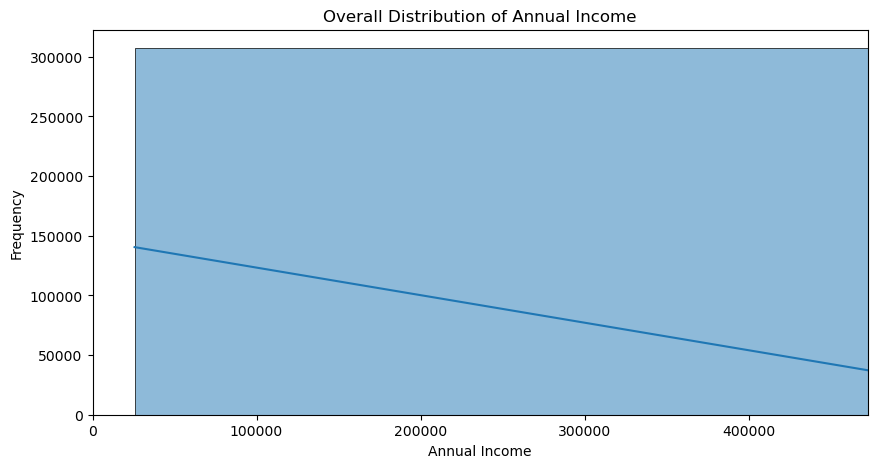

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AMT_INCOME_TOTAL'], bins=100, kde=True)
plt.title('Overall Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.xlim(0, df['AMT_INCOME_TOTAL'].quantile(0.99))  # Focus on 99% range to ignore extreme outliers
plt.show()

###  Distribution of Annual Income

The histogram shows that the distribution of `AMT_INCOME_TOTAL` is highly right-skewed.  
Most applicants earn between **50,000 and 300,000**, while a small number earn extremely high incomes.  
To focus on meaningful comparisons and minimize distortion caused by outliers, a logarithmic scale is applied in later visualizations (e.g., boxplots by `TARGET`).

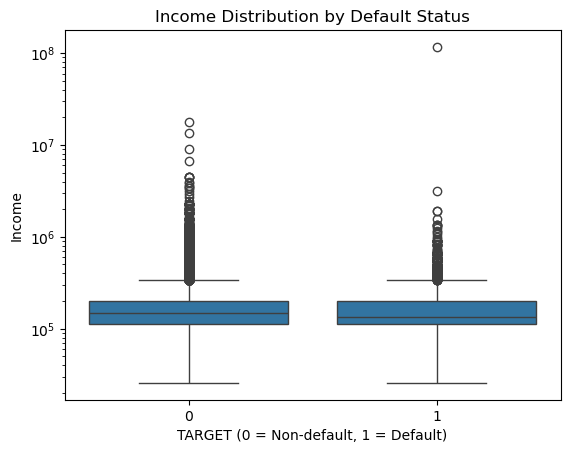

In [28]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.title("Income Distribution by Default Status")
plt.yscale('log')
plt.xlabel("TARGET (0 = Non-default, 1 = Default)")
plt.ylabel("Income")
plt.show()

###  Insight: Income vs Loan Default

Although there are many outliers with extremely high income values, the overall distribution of income appears similar between customers who defaulted (TARGET=1) and those who did not (TARGET=0).  
The median income and interquartile range (IQR) for both groups are nearly identical.  

>  **Conclusion:** This suggests that **income alone may not be a strong indicator of default risk**, and other variables should be explored (e.g., age, employment, credit amount, etc.).

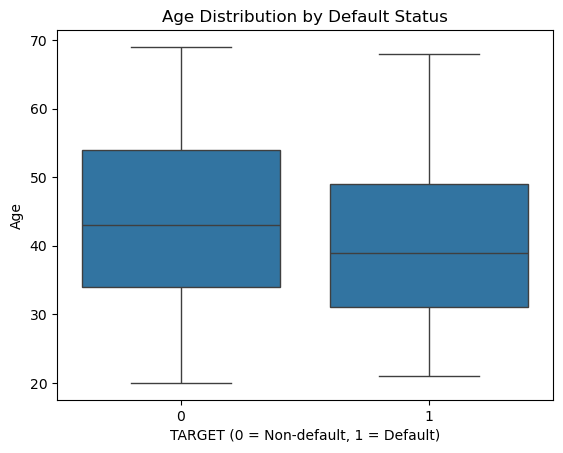

In [30]:
sns.boxplot(x='TARGET', y='AGE_YEARS', data=df)
plt.title('Age Distribution by Default Status')
plt.xlabel('TARGET (0 = Non-default, 1 = Default)')
plt.ylabel('Age')
plt.show()

###  Insight: Age vs Default Risk

The boxplot reveals a clear relationship between age and the likelihood of loan default:

- Customers who **defaulted** on their loans (`TARGET = 1`) tend to be **younger**, with a **lower median age (~38)**.
- Customers who **did not default** (`TARGET = 0`) are generally **older**, with a **higher median age (~44)**.
- The interquartile range (IQR) for defaulters is slightly narrower, indicating that younger clients who default tend to fall within a more concentrated age band.
- This pattern suggests that **younger applicants may pose a higher credit risk**, possibly due to limited work experience, lower income stability, or riskier financial behavior.

> ✅ **Conclusion:** Age is a meaningful predictor of default risk and should be considered in further modeling steps.


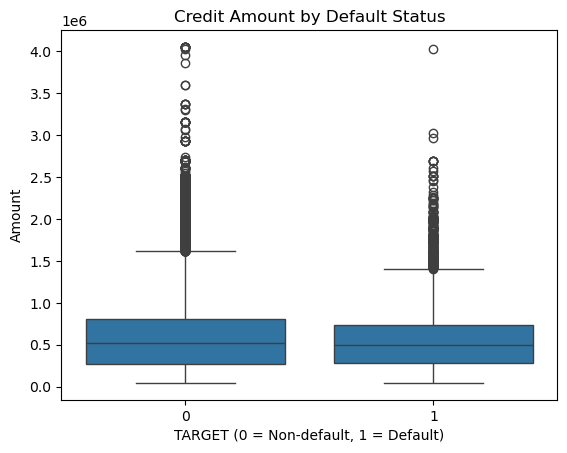

In [32]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df)
plt.title('Credit Amount by Default Status')
plt.xlabel('TARGET (0 = Non-default, 1 = Default)')
plt.ylabel('Amount')
plt.show()

###  Insight: Credit Amount vs Default Status

The boxplot illustrates the distribution of credit amounts for customers who defaulted (`TARGET = 1`) and those who did not (`TARGET = 0`):

- The **median credit amount** is relatively similar between the two groups, around **500,000 to 600,000 RUB**.
- Both groups include a significant number of **high-value outliers**, indicating some clients apply for very large loans.
- Interestingly, customers who **defaulted** tend to have **slightly lower loan amounts**, while those with **larger loans are more likely to repay**.
- This may suggest that **clients with smaller loans are not necessarily lower-risk**—perhaps due to **income instability, lack of collateral, or different financial behavior**.

> ✅ **Conclusion:** Credit amount alone does not clearly distinguish between defaulters and non-defaulters, but combined with other variables, it may contribute to overall risk assessment.


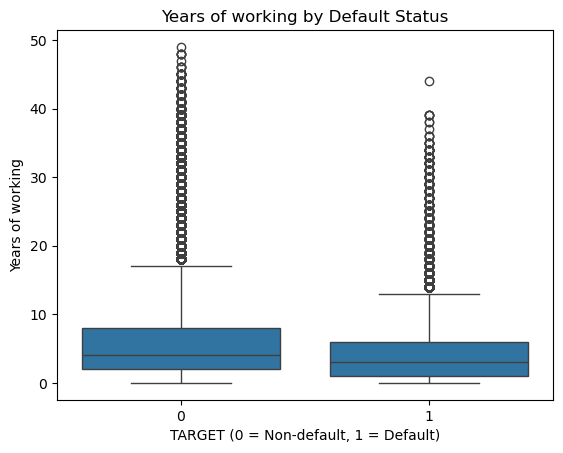

In [34]:
sns.boxplot(x='TARGET', y='YEARS_EMPLOYED', data=df)
plt.title('Years of working by Default Status')
plt.xlabel('TARGET (0 = Non-default, 1 = Default)')
plt.ylabel('Years of working')
plt.show()

###  Insight: Years of Employment vs Default Status

The boxplot shows a clear pattern in the number of years worked by default status:

- Customers who **defaulted** on their loans (`TARGET = 1`) tend to have **fewer years of work experience**, with a median of around **3–4 years**.
- Customers who **did not default** (`TARGET = 0`) typically have **longer work histories**, with a median of around **6–7 years**.
- The difference in interquartile ranges (IQR) suggests that employment history is more consistent and longer for non-defaulters.
- This pattern indicates that **work stability and career length may play a key role in creditworthiness**.

>  **Conclusion:** Years of employment is a valuable predictor of default risk and should be retained as an important feature for modeling.

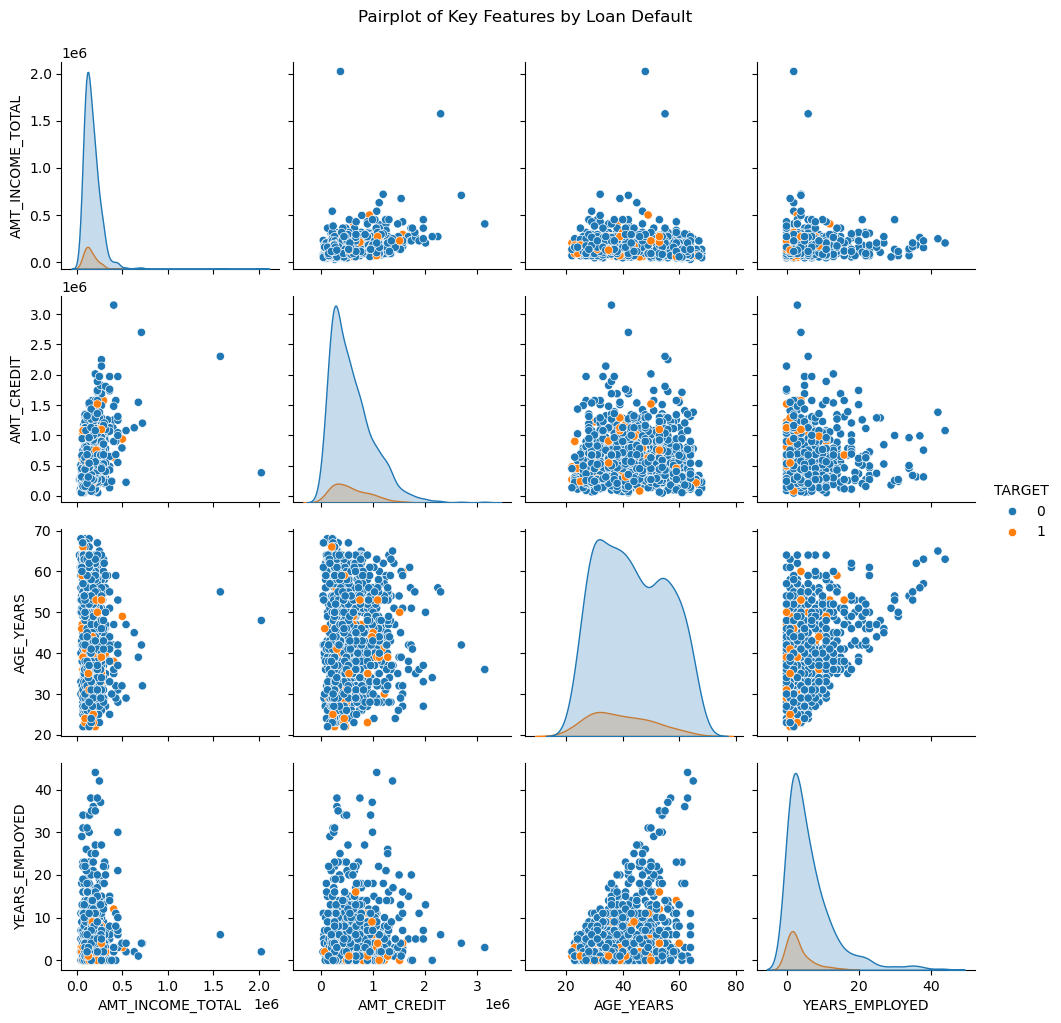

In [36]:
sample_df = df[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AGE_YEARS", "YEARS_EMPLOYED", "TARGET"]].sample(1000, random_state=42)
sns.pairplot(sample_df, hue="TARGET", diag_kind="kde")
plt.suptitle("Pairplot of Key Features by Loan Default", y=1.02)
plt.show()

###  Pairplot Analysis of Key Features

This pairplot visualizes the relationships between four key numerical features:
- `AMT_INCOME_TOTAL` (Annual Income)
- `AMT_CREDIT` (Credit Amount)
- `AGE_YEARS` (Age)
- `YEARS_EMPLOYED` (Years Employed)

colored by `TARGET` (Loan Default: 1 = Default, 0 = Non-default).

####  Key Insights:

- **Income & Credit Distributions**:  
  Both `AMT_INCOME_TOTAL` and `AMT_CREDIT` are **heavily right-skewed**, with most values concentrated at the lower end.  
  There's no clear separation between defaulters and non-defaulters based on income or credit amount alone.

- **Age vs Default**:  
  Defaulters (`TARGET=1`, orange) tend to be **younger** than non-defaulters.  
  This suggests that **age may be a useful predictor** of credit risk.

- **Employment Years**:  
  Many defaulters have **fewer years of employment**, reinforcing the idea that **less work experience is associated with higher risk**.

- **Weak Correlation Between Features**:  
  There's no strong linear correlation between income, credit, age, and employment, indicating the model may need to capture **non-linear relationships**.

>  Overall, this plot reveals that while income and credit alone may not distinguish risk levels, age and employment duration appear more informative for predicting defaults.


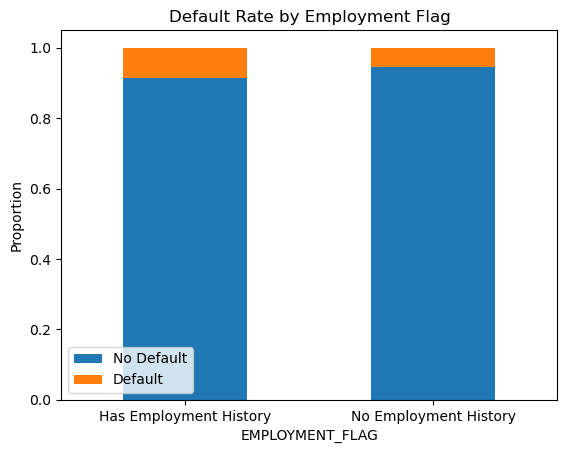

In [38]:
pd.crosstab(df["EMPLOYMENT_FLAG"], df["TARGET"], normalize="index").plot(kind="bar", stacked=True)
plt.title("Default Rate by Employment Flag")
plt.ylabel("Proportion")
plt.xticks([0, 1], labels=["Has Employment History", "No Employment History"], rotation=0)
plt.legend(["No Default", "Default"])
plt.show()

###  Insight: Default Rate by Employment History (Corrected)

Contrary to common expectations, the default rate is actually **higher** among customers who **have an employment history**.

- Customers with a known work history (`EMPLOYMENT_FLAG = False`) show a **higher proportion of defaults**, as seen by the larger orange segment in the bar.
- Meanwhile, those without recorded employment (`EMPLOYMENT_FLAG = True`) have a **lower default rate**.
- This unexpected trend may reflect that non-working individuals in the dataset are **retirees or financially secure individuals**, rather than unemployed or risky borrower.

> ✅ **Conclusion:** `EMPLOYMENT_FLAG` remains an important feature, but its interpretation must be contextualized — absence of work history in this dataset may not imply high risk.



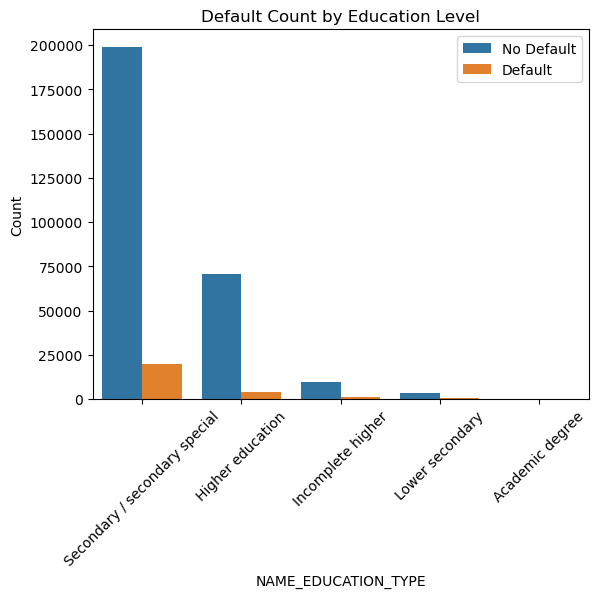

In [40]:
sns.countplot(data=df, x="NAME_EDUCATION_TYPE", hue="TARGET")
plt.title("Default Count by Education Level")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.show()

###  Insight: Default Count by Education Level

This countplot illustrates the number of loan applicants by their education level and default status:

- The majority of clients fall under the **"Secondary / Secondary special"** education level. This group also has the **highest absolute number of defaults**.
- Clients with **"Higher education"** show **fewer defaults** in both count and proportion, suggesting a potential link between higher education and better credit behavior.
- Although smaller in size, the **"Incomplete higher"** and **"Lower secondary"** groups still contribute to loan defaults, showing that default risk exists across all education levels.
- The **"Academic degree"** group shows virtually no defaults, but this group is too small to draw solid conclusions.

>  **Conclusion:** Education level appears to correlate with credit risk. Applicants with higher education tend to default less, while those with lower education levels contribute more to default cases in absolute terms.


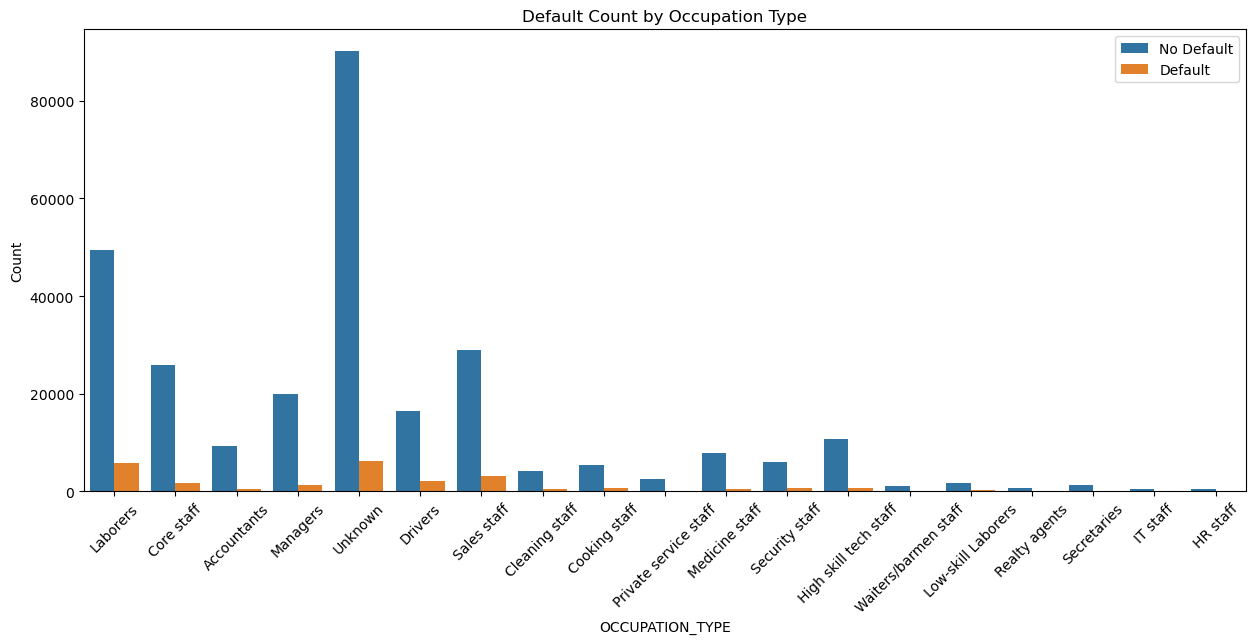

In [42]:
plt.figure(figsize=(15, 6))
order = df["OCCUPATION_TYPE"].value_counts().index
sns.countplot(data=df, x="OCCUPATION_TYPE", hue="TARGET")
plt.title("Default Count by Occupation Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.show()

###  Insight: Default Count by Occupation Type

The chart displays the number of loan applicants and defaults by occupation type:

- **"Laborers"** represent the largest group of applicants and also account for the highest number of defaults, suggesting that this occupation group may carry greater credit risk.
- Other groups such as **"Sales Staff"**, **"Drivers"**, and **"Core Staff"** also show a relatively high number of defaults.
- In contrast, **higher-skilled occupations** such as **"Managers"**, **"High Skill Tech Staff"**, and **"Accountants"** demonstrate fewer defaults, indicating better credit behavior.
- Some occupations like **"HR Staff"** and **"IT Staff"** show very few cases and thus are statistically insignificant for drawing conclusios.

> ✅ **Conclusion:** Occupation type appears to have a strong relationship with default likelihood. Applicants in physically demanding or lower-income jobs tend to default more, while those in professional roles show more financial stability.


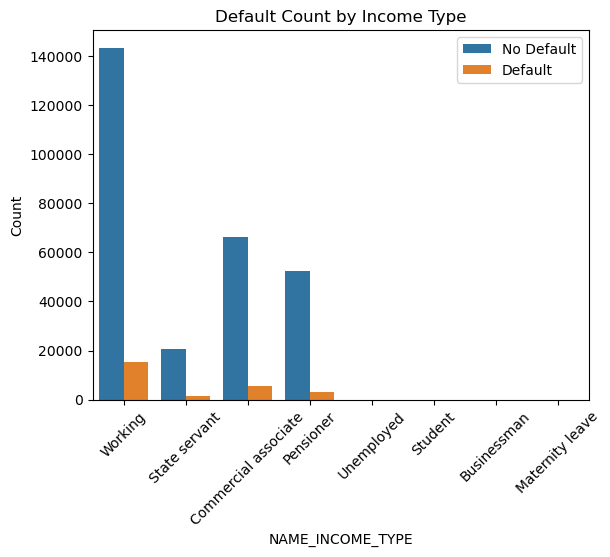

In [44]:
sns.countplot(data=df, x="NAME_INCOME_TYPE", hue="TARGET")
plt.title("Default Count by Income Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.show()

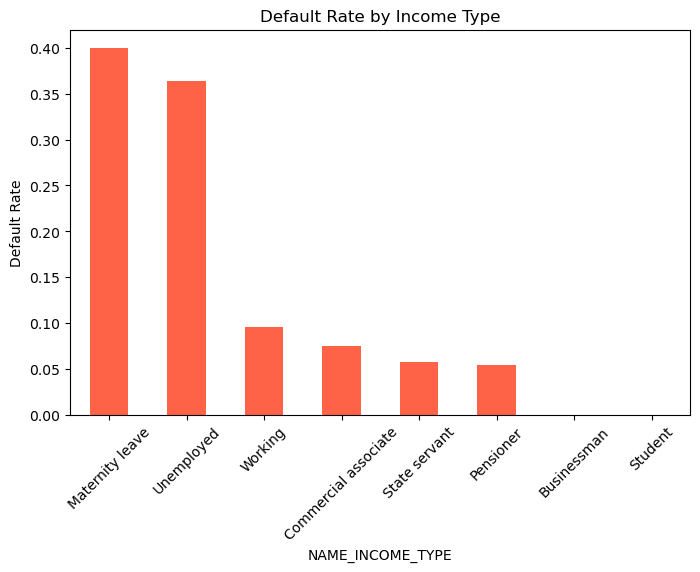

In [45]:
default_rate = df.groupby("NAME_INCOME_TYPE")["TARGET"].mean().sort_values(ascending=False)
default_rate.plot(kind="bar", color="tomato", figsize=(8, 5))
plt.title("Default Rate by Income Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.show()

###  Insight: Income Type vs Loan Default

Two plots were used to analyze the relationship between income type and loan default:

- The **countplot** shows that most applicants are from the **"Working"** group, followed by **"Commercial associates"** and **"Pensioners"**.
- While "Working" has the highest absolute number of defaults, this is due to the group’s large size.

However, the **default rate chart** reveals a deeper insight:

- **"Maternity leave"** and **"Unemployed"** groups have the **highest default rates**, around **40%** and **36%** respectively.
- **"State servants"** and **"Pensioners"** have the **lowest default rates**, indicating strong credit reliability.
- The **"Working"** group has a moderate default rate (~9.5%), aligning with general working-class risk.
- Some groups (e.g., "Students", "Businessmen") have a default rate of 0, but the sample size is too small for conclusive interpretation.

>  **Conclusion:** Default risk is not only a function of income presence, but also income stability. Groups like the unemployed and those on maternity leave exhibit the highest risk and may require additional credit scrutiny.


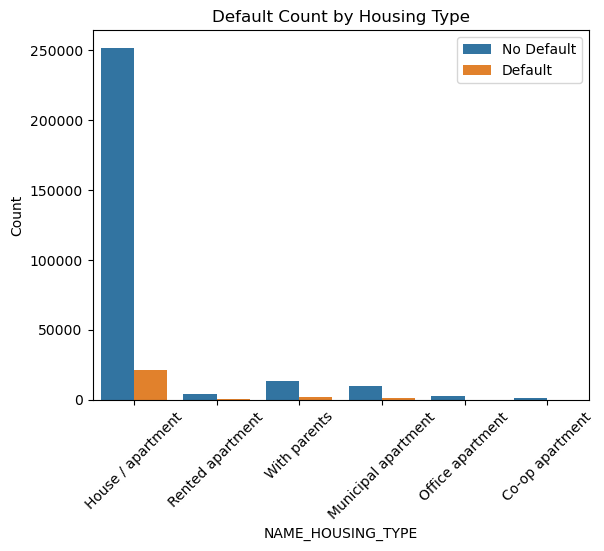

In [47]:
sns.countplot(data=df, x="NAME_HOUSING_TYPE", hue="TARGET")
plt.title("Default Count by Housing Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.show()

###  Insight: Housing Type vs Default Status

The bar chart shows the distribution of loan defaults across different housing types:

- The vast majority of applicants live in a **"House / apartment"**, which also accounts for the highest number of defaults — this is likely due to sheer volume, not necessarily higher risk.
- Applicants living in **"Rented apartment"** or **"Municipal apartment"** exhibit a **visibly higher proportion of defaults** compared to others.
- Those living **"With parents"** or in **"Co-op apartments"** have relatively low default counts, potentially due to financial support or stability.

> **Conclusion:**  
While "House / apartment" dominates due to volume, **housing type may still reflect financial conditions**, with some categories (e.g. rented housing) linked to elevated default risk. This variable may be worth encoding and including in modeling.


<Axes: xlabel='TARGET', ylabel='EXT_SOURCE_2'>

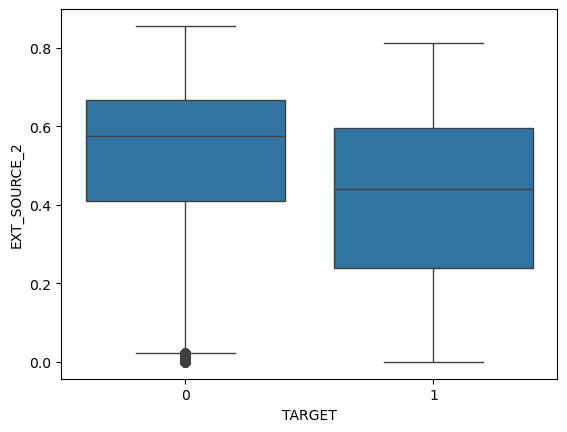

In [49]:
sns.boxplot(x="TARGET", y="EXT_SOURCE_2", data=df)

<Axes: xlabel='TARGET', ylabel='EXT_SOURCE_3'>

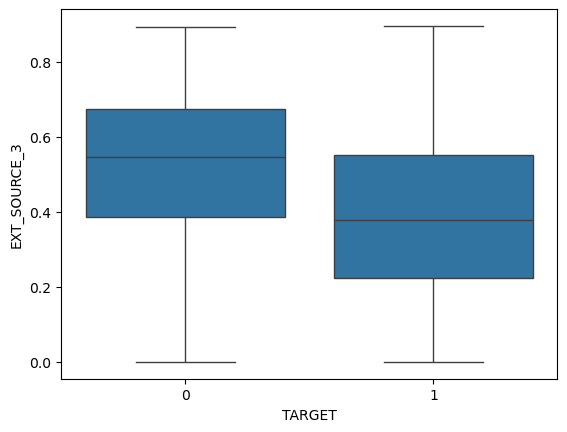

In [50]:
sns.boxplot(x="TARGET", y="EXT_SOURCE_3", data=df)

###  Insight: EXT_SOURCE_2 and EXT_SOURCE_3 vs Default Status

The boxplots of `EXT_SOURCE_2` and `EXT_SOURCE_3` reveal a clear inverse relationship between external risk scores and loan default probability:

- Customers who **defaulted** (`TARGET = 1`) tend to have **lower** scores in both `EXT_SOURCE_2` and `EXT_SOURCE_3`.
- Those who **did not default** (`TARGET = 0`) show **higher median values** and a more favorable score distribution overall.
- This indicates that external scoring systems are effective in capturing creditworthiness — **lower external scores are associated with a higher likelihood of defaul>**.

✅ **Conclusion:**  
`EXT_SOURCE_2` and `EXT_SOURCE_3` are meaningful predictors of default risk and should be considered as key features in modeling and risk assessment.


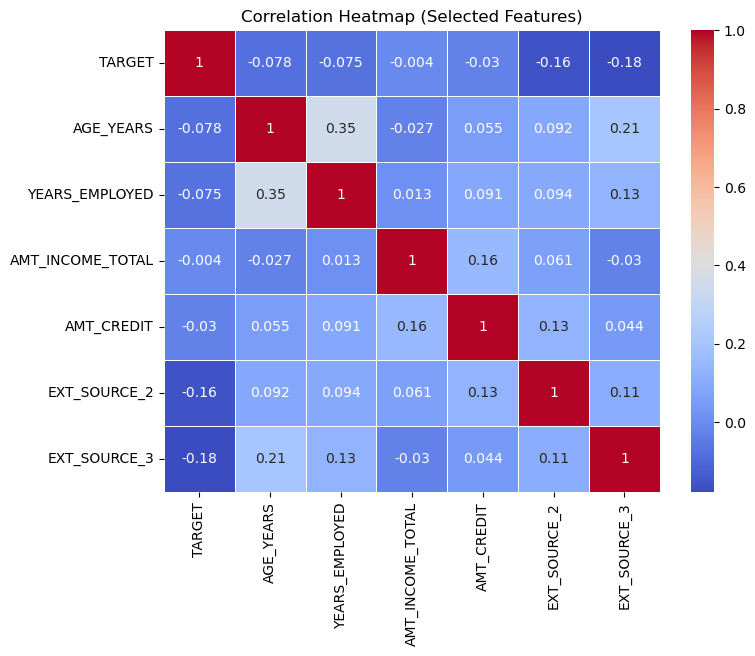

In [52]:
selected_cols = ['TARGET', 'AGE_YEARS', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL', 
                 'AMT_CREDIT', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

subset_df = df[selected_cols]

plt.figure(figsize=(8, 6))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Selected Features)")
plt.show()

###  Insight: Correlation Analysis with TARGET

The heatmap reveals that **all selected features show negative correlation with `TARGET`**, which represents loan default status (`1` = default, `0` = no default). This means:

- As the value of these features **increases**, the **likelihood of default decreases**.
### 🔹 Key Observations:
- **`EXT_SOURCE_3` (r = –0.18)** and **`EXT_SOURCE_2` (r = –0.16)** are the most **strongly correlated features** (negatively).  
  ⟶ Applicants with **higher external risk scores** are less likely to default.

- **`AGE_YEARS` (r = –0.078)** and **`YEARS_EMPLOYED` (r = –0.075)** also show moderate negative correlation, indicating:
  - Older and more experienced clients are **less risky**.

- Financial variables such as:
  - `AMT_CREDIT` (r = –0.03) and  
  - `AMT_INCOME_TOTAL` (r = –0.004)  
  show **very weak or negligible correlation**, suggesting that **credit amount or income alone are not strong predictors** of defa>lt risk.

---

✅ **Conclusion:**  
Features like **external scores and employment/age** are more useful in identifying default risk than income or credit size. These should be prioritized in feature engineering and modeling.


In [54]:
df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]

df["EMPLOYMENT_AGE_RATIO"] = df["YEARS_EMPLOYED"] / df["AGE_YEARS"]
df["EMPLOYMENT_AGE_RATIO"] = df["EMPLOYMENT_AGE_RATIO"].replace([np.inf, -np.inf], np.nan)

df["EXT_SCORE_MEAN"] = df[["EXT_SOURCE_2", "EXT_SOURCE_3"]].mean(axis=1)

In [55]:
df['CREDIT_INCOME_RATIO'].head()

0    2.007889
1    4.790750
2    2.000000
3    2.316167
4    4.222222
Name: CREDIT_INCOME_RATIO, dtype: float64

In [56]:
df[["CREDIT_INCOME_RATIO", "EMPLOYMENT_AGE_RATIO", "EXT_SCORE_MEAN", "TARGET"]].corr()["TARGET"].sort_values()

EXT_SCORE_MEAN         -0.211262
EMPLOYMENT_AGE_RATIO   -0.068916
CREDIT_INCOME_RATIO    -0.007727
TARGET                  1.000000
Name: TARGET, dtype: float64

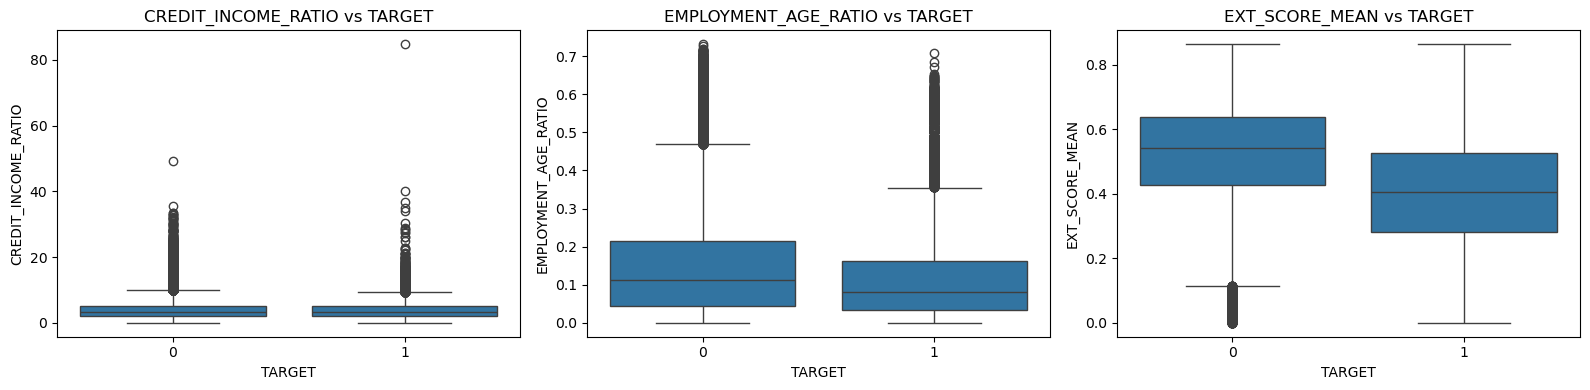

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))

# 1. CREDIT_INCOME_RATIO
plt.subplot(1, 3, 1)
sns.boxplot(x="TARGET", y="CREDIT_INCOME_RATIO", data=df)
plt.title("CREDIT_INCOME_RATIO vs TARGET")

# 2. EMPLOYMENT_AGE_RATIO
plt.subplot(1, 3, 2)
sns.boxplot(x="TARGET", y="EMPLOYMENT_AGE_RATIO", data=df)
plt.title("EMPLOYMENT_AGE_RATIO vs TARGET")

# 3. EXT_SCORE_MEAN
plt.subplot(1, 3, 3)
sns.boxplot(x="TARGET", y="EXT_SCORE_MEAN", data=df)
plt.title("EXT_SCORE_MEAN vs TARGET")

plt.tight_layout()
plt.show()


##  Key Insights from Boxplots

1. **Credit-to-Income Ratio**  
   Applicants who default show more extreme values in the credit/income ratio, indicating potential over-borrowing behavior.

2. **Employment-to-Age Ratio**  
   Slight indication that those with higher employment stability relative to their age may default less often.

3. **External Risk Score (Mean)**  
   A clear negative correlation is observed: lower `EXT_SCORE_MEAN` values are strongly associated with higher default rates.  
   → This is a highly valuable feature for risk assessment.


In [59]:
crosstabs = {
    "Education": pd.crosstab(df["NAME_EDUCATION_TYPE"], df["TARGET"], normalize="index"),
    "Income Type": pd.crosstab(df["NAME_INCOME_TYPE"], df["TARGET"], normalize="index"),
    "Occupation": pd.crosstab(df["OCCUPATION_TYPE"], df["TARGET"], normalize="index"),
}

In [60]:
def plot_stacked_bar(crosstab_df, title):
    crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 5), colormap="Set2")
    plt.title(title)
    plt.ylabel("Percentage (%)")
    plt.xlabel("")
    plt.legend(["Non-Default (0)", "Default (1)"], title="TARGET", loc="upper right")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

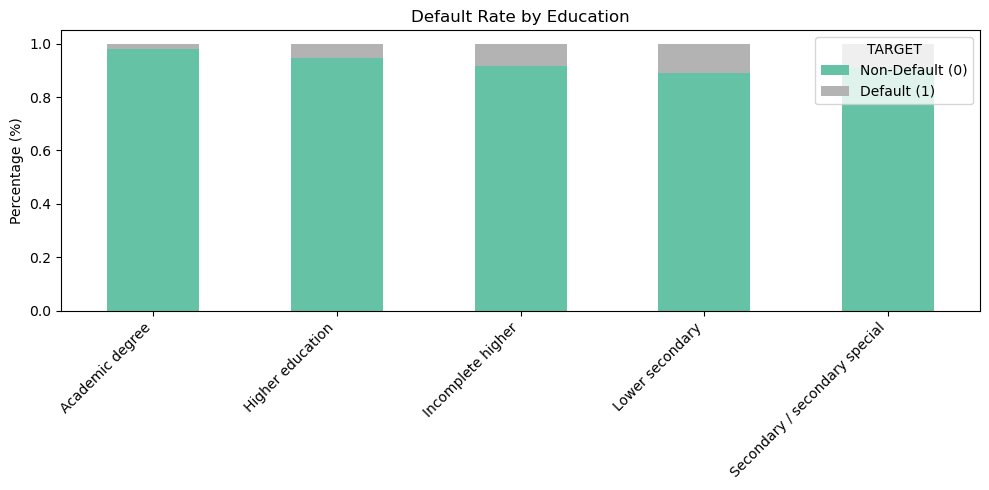

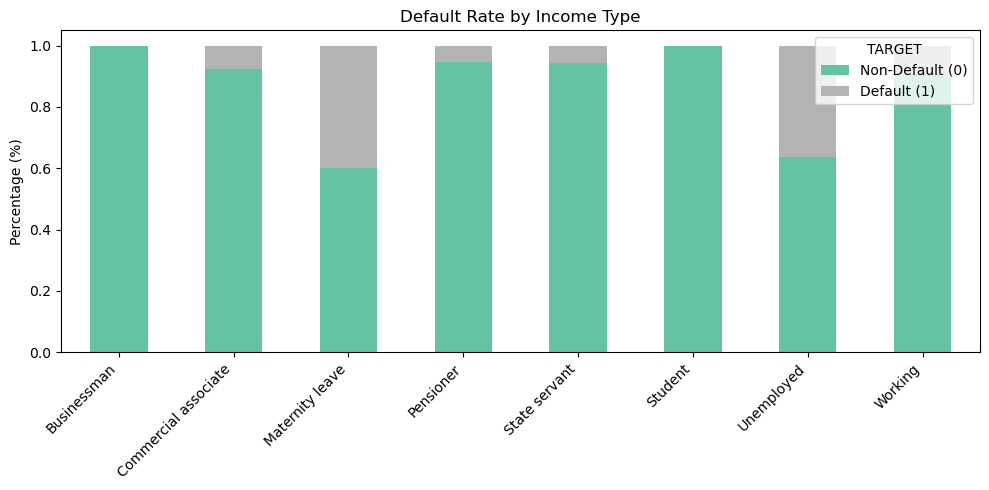

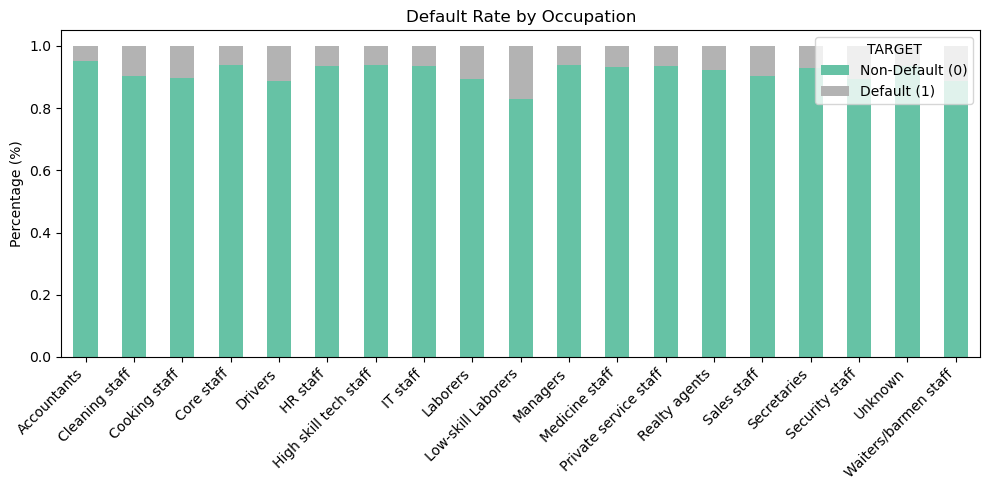

In [61]:
for label, ct in crosstabs.items():
    plot_stacked_bar(ct, f"Default Rate by {label}")

In [62]:
cols_for_powerbi = [
    'SK_ID_CURR', 'TARGET',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE',
    'CNT_CHILDREN', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT',
    'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'AGE_YEARS', 'YEARS_EMPLOYED'
]
df[cols_for_powerbi].to_csv('credit_risk_cleaned_maincols.csv', index=False)

In [63]:
dim_education = df[['NAME_EDUCATION_TYPE']].drop_duplicates().reset_index(drop=True)
dim_education['ID_Education'] = dim_education.index + 1
df = df.merge(dim_education, on='NAME_EDUCATION_TYPE', how='left')

In [64]:
dim_occupation = df[['OCCUPATION_TYPE']].drop_duplicates().reset_index(drop=True)
dim_occupation['ID_Occupation'] = dim_occupation.index + 1
df = df.merge(dim_occupation, on='OCCUPATION_TYPE', how='left')

In [65]:
dim_incometype = df[['NAME_INCOME_TYPE']].drop_duplicates().reset_index(drop=True)
dim_incometype['ID_IncomeType'] = dim_incometype.index + 1
df = df.merge(dim_incometype, on='NAME_INCOME_TYPE', how='left')

In [66]:
dim_housing_type = df[['NAME_HOUSING_TYPE']].drop_duplicates().reset_index(drop=True)
dim_housing_type['ID_HousingType'] = dim_housing_type.index + 1
df = df.merge(dim_housing_type, on='NAME_HOUSING_TYPE', how='left')

In [67]:
fact_columns = [
    'SK_ID_CURR', 'TARGET',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'CNT_CHILDREN', 'REGION_POPULATION_RELATIVE',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'AGE_YEARS', 'YEARS_EMPLOYED',
    'ID_Education', 'ID_IncomeType', 'ID_Occupation', 'ID_HousingType' 
]
df_fact = df[fact_columns]
df_fact.to_csv("fact_applications.csv", index=False)

In [68]:
dim_education.to_csv("dim_education.csv", index=False)
dim_incometype.to_csv("dim_income_type.csv", index=False)
dim_occupation.to_csv("dim_occupation.csv", index=False)
dim_housing_type.to_csv("dim_housing_type.csv", index=False)

In [69]:
q33 = df['AMT_INCOME_TOTAL'].quantile(0.33)
q66 = df['AMT_INCOME_TOTAL'].quantile(0.66)
print(f"Low: <= {q33:,.0f} ")
print(f"Medium: > {q33:,.0f} ₫ and <= {q66:,.0f} ")
print(f"High: > {q66:,.0f} ")

Low: <= 117,000 
Medium: > 117,000 ₫ and <= 180,000 
High: > 180,000 


In [279]:
features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'AGE_YEARS', 'YEARS_EMPLOYED','REGION_POPULATION_RELATIVE', 'CNT_CHILDREN', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

X = df[features]
y = df['TARGET']

In [281]:
X = X.fillna(X.median())

In [283]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [287]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [288]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [289]:
from sklearn.metrics import classification_report, roc_auc_score

print("🔹 Logistic Regression:")
print(classification_report(y_test, log_model.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))

print("\n🔸 Random Forest:")
print(classification_report(y_test, rf_model.predict(X_test)))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

🔹 Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     56554
           1       0.15      0.65      0.24      4949

    accuracy                           0.67     61503
   macro avg       0.55      0.66      0.52     61503
weighted avg       0.89      0.67      0.75     61503

ROC AUC: 0.724019618348124

🔸 Random Forest:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.50      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.71      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503

ROC AUC: 0.7003998070698463


##  Model Evaluation Summary

We trained two classification models to predict credit default risk using basic financial and demographic features:

###  Logistic Regression (with `class_weight='balanced'`)

- This model handled class imbalance better and was able to **identify a significant portion of default cases** (class `1`).
- It achieved a **ROC AUC score of 0.72**, showing decent separation between risky and safe clients.
- While the precision for class 1 was low (due to many false positives), its **recall was strong (65%)**, which is valuable for minimizing credit risk.

 **Best choice when the goal is to catch as many defaulters as possible**, even if some false alarms are tolerated.
---
###  Random Forest (with `class_weight='balanced'`)

- Despite high overall accuracy, this model struggled with identifying default cases (`recall = 1%`).
- The model was heavily biased toward the majority class (`0`), resulting in **very poor detection of true defaulters**.
- ROC AUC was slightly lower at **0.69**.

 **Not recommended in this case**, as it fails to flag risky customers effectively.

---

###  Conclusion:

Logistic Regression is more effective for our current use case, as it provides **balanced performance and better recall on defaulted customers**, making it suitable for credit risk detection in this dataset.


In [292]:
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

result_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_log[:10] 
})
print(result_df)

   Actual  Predicted
0       0          1
1       0          0
2       0          1
3       0          0
4       0          0
5       0          1
6       0          0
7       0          1
8       0          1
9       0          0


In [293]:
# Dự đoán xác suất vỡ nợ
y_proba = model.predict_proba(X_test)[:, 1]
# Tạo DataFrame kết quả
result_df = pd.DataFrame(X_test, columns=features).copy()
result_df['Actual'] = y_test.values
result_df['Predicted'] = y_pred_log
result_df['Prob_Default'] = y_proba

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [294]:
defaults = result_df[result_df['Actual'] == 1]

In [295]:
defaults.sample(5, random_state=42)  # Xem thử 5 người vỡ nợ

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE_YEARS,YEARS_EMPLOYED,REGION_POPULATION_RELATIVE,CNT_CHILDREN,EXT_SOURCE_2,EXT_SOURCE_3,Actual,Predicted,Prob_Default
2653,0.426792,0.188760,0.379069,0.370127,-0.371069,-0.796659,0.399377,0.807273,-2.348536,0.785196,1,1,0.634296
57204,0.142129,-0.855489,-0.473213,-0.848433,-0.036469,3.126762,-0.775136,-0.577538,0.396629,0.112063,1,0,0.381940
23845,0.426792,-0.370260,-0.351193,-0.239153,-0.287419,2.785595,-0.458969,-0.577538,-0.891984,0.285649,1,0,0.543593
48814,0.142129,1.712648,1.006249,1.588687,-1.123919,-0.796659,1.078997,0.807273,0.156187,-2.021644,1,1,0.595935
22383,-0.427196,0.387995,0.260774,0.370127,1.385581,-0.284909,0.399377,-0.577538,1.092708,1.797319,1,0,0.069337
